In [151]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Question 3: Which NFT collections are the best to invest in?

This dataset has information pulled on January 16, 2022, and represents all time information for the top NFT collections. 

Data cleansing & transformation

In [152]:
# CSV 1

nfth = pd.read_csv("C:/Users/DELL/OneDrive/CFG/NFT_Sales_history.csv")

nfth

,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.000000e+00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-23,1.020300e+03,19,8.0,0,19.0,53.70,1.020300e+03,19.0,8.0,0.0
2,2017-06-24,2.261140e+03,40,21.0,0,21.0,56.53,1.240840e+03,21.0,13.0,0.0
3,2017-06-25,2.778690e+03,53,28.0,0,13.0,52.43,5.175500e+02,13.0,7.0,0.0
4,2017-06-26,3.203320e+03,67,34.0,0,14.0,47.81,4.246300e+02,14.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1601,2021-11-08,1.008803e+10,10913146,NaN,6541355,14829.0,924.39,7.706698e+07,59264.0,NaN,44435.0
1602,2021-11-09,1.014001e+10,10964025,NaN,6573511,18723.0,924.84,5.197508e+07,50879.0,NaN,32156.0
1603,2021-11-10,1.019902e+10,11008847,NaN,6601205,17128.0,926.44,5.901034e+07,44822.0,NaN,27694.0
1604,2021-11-11,1.023456e+10,11022782,NaN,6609013,6127.0,928.49,3.554317e+07,13935.0,NaN,7808.0


In [153]:
nfth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          1606 non-null   object 
 1   Sales_USD_cumsum              1606 non-null   float64
 2   Number_of_Sales_cumsum        1606 non-null   int64  
 3   Active_Market_Wallets_cumsum  1598 non-null   float64
 4   Primary_Sales_cumsum          1606 non-null   int64  
 5   Secondary_Sales_cumsum        1605 non-null   float64
 6   AverageUSD_cum                1605 non-null   float64
 7   Sales_USD                     1605 non-null   float64
 8   Number_of_Sales               1605 non-null   float64
 9   Active_Market_Wallets         1597 non-null   float64
 10  Primary_Sales                 1605 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 138.1+ KB


In [154]:
# checking for null values

nfth.isnull().sum()

Date                            0
Sales_USD_cumsum                0
Number_of_Sales_cumsum          0
Active_Market_Wallets_cumsum    8
Primary_Sales_cumsum            0
Secondary_Sales_cumsum          1
AverageUSD_cum                  1
Sales_USD                       1
Number_of_Sales                 1
Active_Market_Wallets           9
Primary_Sales                   1
dtype: int64

In [155]:
# Remove null values

nfth['Active_Market_Wallets_cumsum'] = nfth['Active_Market_Wallets_cumsum'].fillna(nfth['Active_Market_Wallets_cumsum'].mean())
nfth['Active_Market_Wallets'] = nfth['Active_Market_Wallets'].fillna(nfth['Active_Market_Wallets'].mean())
nfth = nfth.fillna(0)

In [156]:
nfth.isnull().sum()

Date                            0
Sales_USD_cumsum                0
Number_of_Sales_cumsum          0
Active_Market_Wallets_cumsum    0
Primary_Sales_cumsum            0
Secondary_Sales_cumsum          0
AverageUSD_cum                  0
Sales_USD                       0
Number_of_Sales                 0
Active_Market_Wallets           0
Primary_Sales                   0
dtype: int64

In [157]:
# delete columns

nfth.drop(nfth[['AverageUSD_cum','Active_Market_Wallets','Secondary_Sales_cumsum','Active_Market_Wallets_cumsum','Primary_Sales_cumsum','Primary_Sales']], axis = 1, inplace = True)

In [158]:
# convert

nfth['Date'] = pd.to_datetime(nfth['Date'], format = '%Y-%m-%d')
nfth['Sales_USD_cumsum'] = nfth['Sales_USD_cumsum'].astype('int64')
nfth['Sales_USD'] = nfth['Sales_USD'].astype('int64')
nfth['Number_of_Sales'] = nfth['Number_of_Sales'].astype('int64')

nfth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    1606 non-null   datetime64[ns]
 1   Sales_USD_cumsum        1606 non-null   int64         
 2   Number_of_Sales_cumsum  1606 non-null   int64         
 3   Sales_USD               1606 non-null   int64         
 4   Number_of_Sales         1606 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 62.9 KB


In [159]:
nfth.set_index('Date', inplace = True)
nfth.describe()

,Sales_USD_cumsum,Number_of_Sales_cumsum,Sales_USD,Number_of_Sales
count,1.606000e+03,1.606000e+03,1.606000e+03,1606.000000
mean,5.914905e+08,3.397818e+06,6.368844e+06,6862.133873
std,1.720005e+09,2.329504e+06,2.485379e+07,12607.583410
min,0.000000e+00,0.000000e+00,-6.196719e+06,-2195.000000
25%,5.129669e+07,1.451181e+06,4.603475e+04,2272.500000
50%,8.691480e+07,3.203392e+06,8.202700e+04,3678.000000
75%,1.328586e+08,4.938128e+06,3.525650e+05,5840.750000
max,1.023456e+10,1.102278e+07,3.886364e+08,161732.000000


In [160]:
# Creating a new CSV file

nfth.to_csv(r'C:/Users/DELL/OneDrive/CFG/Data/notebooks/nft_sales_history.csv')

## History of NFT sales graph

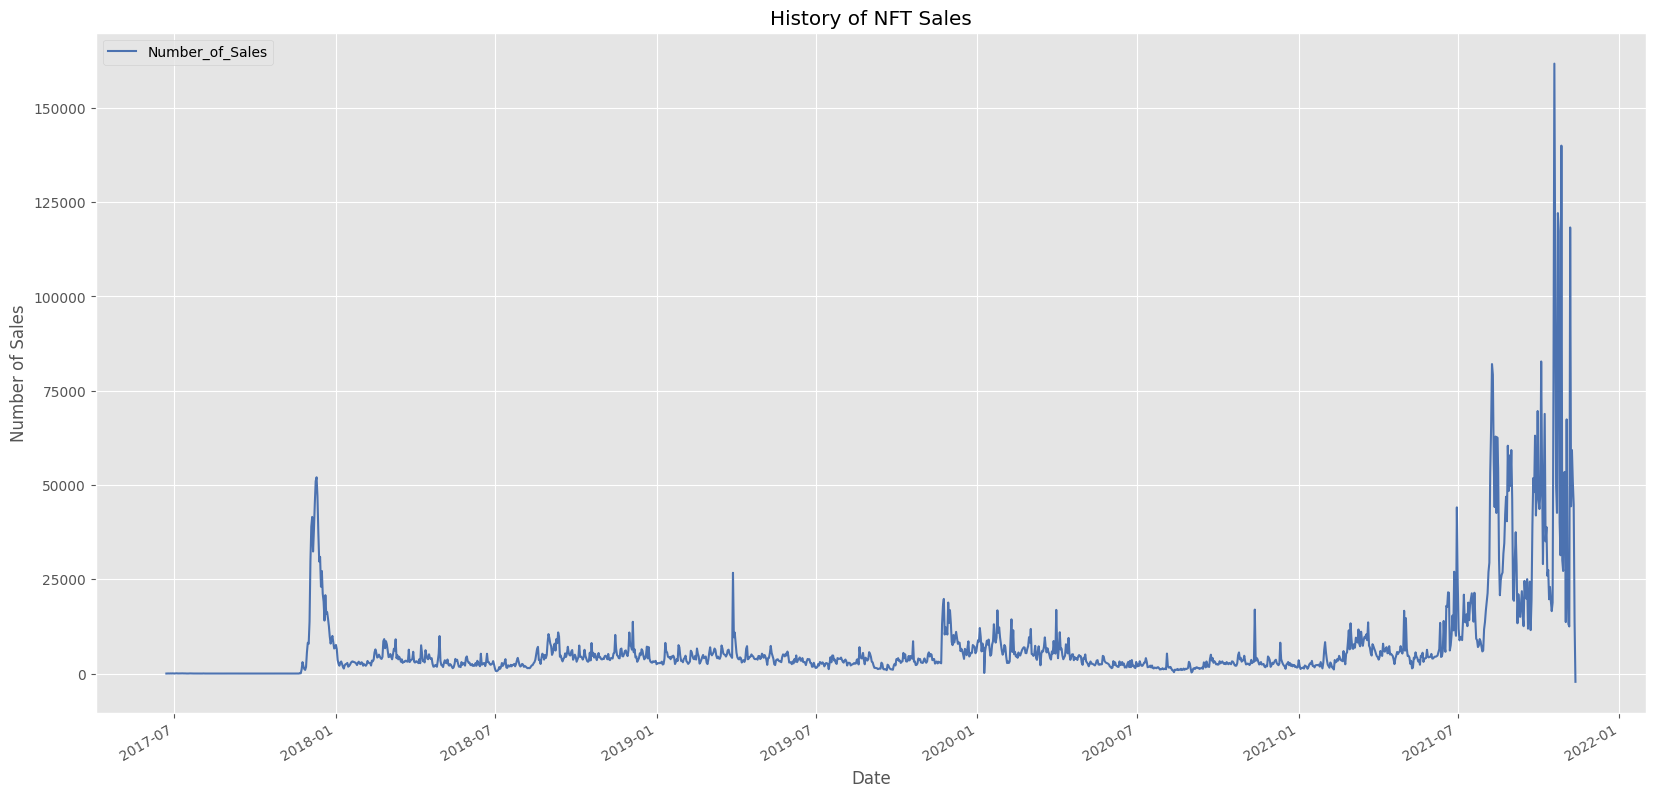

In [161]:
nfth[['Number_of_Sales']].plot(figsize = (20,10)) 

plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.title('History of NFT Sales')

plt.show()

Other than the spike in NFT sales at the start of 2018, NFT sales increased significantly towards the end of 2021 and the beginning of 2022, this is around the same time that Ethereum increased in popularity, which indicates that this could've been the reason for Ethereums growth in 2021 as it is the main market for trading NFTs.

## NFT sales

This is another dataset that consists of 250 collections and their all time statistics such as sales, transactions, ownership and buyers.

In [162]:
nftc = pd.read_csv("C:/Users/DELL/OneDrive/CFG/hemli/nft_sales.csv")

nftc

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,"$4,090,222,023","1,790,587","17,670,824","2,130,467"
1,Bored Ape Yacht Club,"$2,439,754,017","12,052","32,670","6,586"
2,CryptoPunks,"$2,388,467,992","6,076","22,269","3,804"
3,Mutant Ape Yacht Club,"$1,744,822,678","23,768","51,775","13,121"
4,Art Blocks,"$1,310,734,558","33,549","184,470","36,091"
...,...,...,...,...,...
245,Mindblowon,"$21,255,015","11,313","16,333","3,973"
246,Sipherian Surge,"$21,053,426","6,210","15,023","3,636"
247,Gutter Rats,"$20,915,001","2,931","5,209",NaN
248,Wool Pouch,"$20,911,179","2,249","6,139","3,270"


In [163]:
# checking for null values

nftc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Collections  250 non-null    object
 1   Sales        250 non-null    object
 2   Buyers       250 non-null    object
 3   Txns         250 non-null    object
 4   Owners       231 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [164]:
# rename/replace

nftc.rename(columns = {'Txns':'Transactions'}, inplace = True)
nftc['Sales'] = nftc['Sales'].str.replace(',', '')
nftc['Sales'] = nftc['Sales'].str.replace('$', '')
nftc['Buyers'] = nftc['Buyers'].str.replace(',','')
nftc['Transactions'] = nftc['Transactions'].str.replace(',','')
nftc['Owners'] = nftc['Owners'].str.replace(',','')
nftc=nftc.dropna()

In [165]:
# Converting to integar

nftc['Sales'] = nftc['Sales'].astype('int64')
nftc['Buyers'] = nftc['Buyers'].astype('int64')
nftc['Transactions'] = nftc['Transactions'].astype('int64')
nftc['Owners'] = nftc['Owners'].astype('int32')

In [166]:
# creating a column that indicates if a collection made $100 million+ to categorize NFT collections

nftc['100 mil club'] = np.where(nftc['Sales']>=100000000, 'Yes', 'No')

In [167]:
nftc.head()

,Collections,Sales,Buyers,Transactions,Owners,100 mil club
0,Axie Infinity,4090222023,1790587,17670824,2130467,Yes
1,Bored Ape Yacht Club,2439754017,12052,32670,6586,Yes
2,CryptoPunks,2388467992,6076,22269,3804,Yes
3,Mutant Ape Yacht Club,1744822678,23768,51775,13121,Yes
4,Art Blocks,1310734558,33549,184470,36091,Yes


## Collections that made more than 100 million:

Text(0, 0.5, 'NFT Collections')

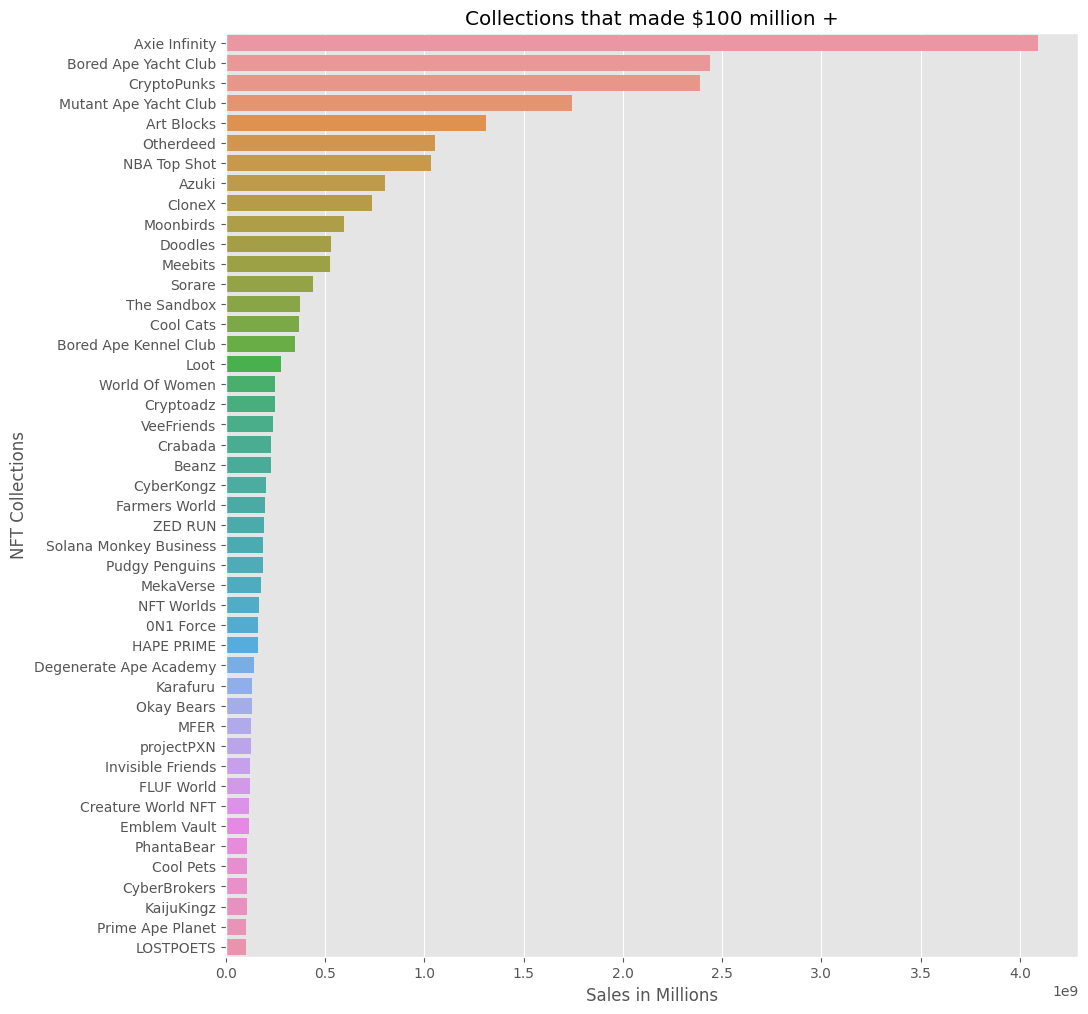

In [168]:
mil_collections = nftc[ nftc['100 mil club'] == 'Yes' ]
plt.figure(figsize=(11,12))
graph = sns.barplot(y= "Collections", x = "Sales", data = mil_collections)
plt.title('Collections that made $100 million +')
plt.xlabel('Sales in Millions')
plt.ylabel('NFT Collections')

Most NFT collections in this dataset have made over $100 million in sales, this is a good indication that NFTs could be a worthwhile investment as they do make profits and returns in investments in the same way that other traditional investments do.

### Analysis

#### Sales from the top 3 collections 

In [169]:
# Sales from 'Axie Infinity' collection

axie_collection = nftc[nftc['Collections'].str.contains("Axie")]

sum_sales = axie_collection['Sales'].sum()

print(f"The total sales from the 'Axie Infinity' Collection are ${sum_sales:,}")
axie_collection

The total sales from the 'Axie Infinity' Collection are $4,090,222,023


,Collections,Sales,Buyers,Transactions,Owners,100 mil club
0,Axie Infinity,4090222023,1790587,17670824,2130467,Yes


In [198]:
# Sales from the 'Bored Ape' collection

bored_collection = nftc[nftc['Collections'].str.contains("Bored Ape Yacht")]

sum_sales = ape_collection['Sales'].sum()

print(f"The total sales from the 'Bored Ape Yacht' Collection are ${sum_sales:,}")
bored_collection

The total sales from the 'Bored Ape Yacht' Collection are $4,959,653,491


,Collections,Sales,Buyers,Transactions,Owners,100 mil club
1,Bored Ape Yacht Club,2439754017,12052,32670,6586,Yes


In [171]:
# crypto punks

crypto_punks_collection = nftc[nftc['Collections'].str.contains("CryptoPunks")]

sum_sales = crypto_punks_collection['Sales'].sum()

print(f"The total sales from the 'CryptoPunks' Collection are ${sum_sales:,}")
crypto_punks_collection

The total sales from the 'CryptoPunks' Collection are $2,388,467,992


,Collections,Sales,Buyers,Transactions,Owners,100 mil club
2,CryptoPunks,2388467992,6076,22269,3804,Yes


In [205]:
top3 = pd.concat([axie_collection, bored_collection, crypto_punks_collection, ], axis=0)
top3

,Collections,Sales,Buyers,Transactions,Owners,100 mil club
0,Axie Infinity,4090222023,1790587,17670824,2130467,Yes
1,Bored Ape Yacht Club,2439754017,12052,32670,6586,Yes
2,CryptoPunks,2388467992,6076,22269,3804,Yes


Text(0, 0.5, 'NFT Collections')

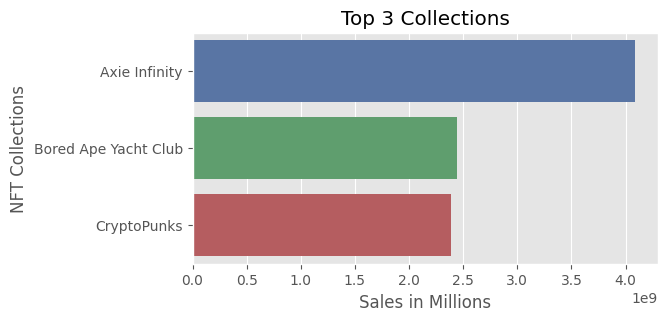

In [211]:
# top 3 collection sales compared to others in a graph

plt.figure(figsize=(6,3))
sns.barplot(y= "Collections", x = "Sales", data = top3)
plt.title('Top 3 Collections')
plt.xlabel('Sales in Millions')
plt.ylabel('NFT Collections')

All 3 of the above collections have made over $2 billion in sales, in comparison to the rest of the NFT collections these are making the most in sales indicating that they would be the best collections to invest in as you are more likely to make a larger return on your investment.

## Collection that made the most sales of all time?


In [172]:
maximum_sale = nftc['Sales'].max()
collection = nftc[nftc['Sales'] == maximum_sale ]['Collections'][0]

print(f'The NFT Collection having maxiumum sales is {collection}')
print(f'Total sales of {collection} is ${maximum_sale:,}')

The NFT Collection having maxiumum sales is Axie Infinity
Total sales of Axie Infinity is $4,090,222,023


## Collection with the most buyers?

In [52]:
maximum_buyers = nftc['Buyers'].max()
b_collection = nftc[nftc['Buyers'] == maximum_buyers ]['Collections'][0]

print(f'The NFT Collection having the most buyers is {b_collection}')
print(f'Total number of buyers for the {b_collection} are {maximum_buyers:,}')

The NFT Collection having the most buyers is Axie Infinity
Total number of buyers for Axie Infinity are 1,790,587


The 'Axie Infinity' collection has made the most sales overall and also has the most buyers, this shows that buying and selling an NFT from this collection is easier as the market for it is more active and it has more popularity therefore, more potential buyers.

## Percentage of total collections that have made over 100 million USD

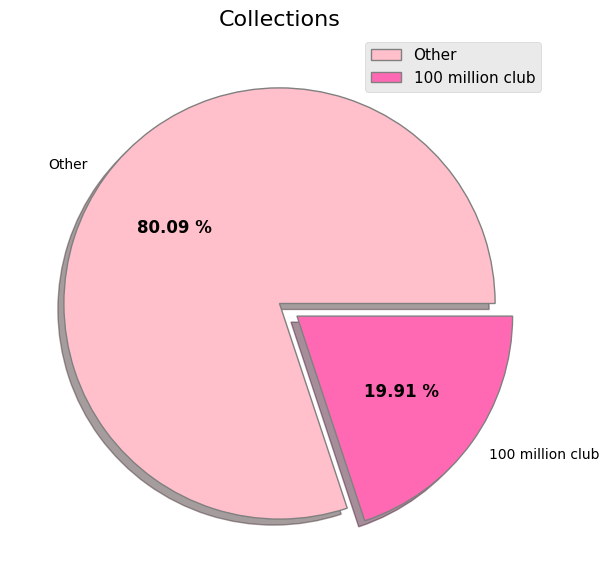

In [173]:
million = nftc.groupby(['100 mil club']).count()['Collections']

labels = ["Other","100 million club"]

explode = (0, 0.1)
 
colors = ("pink", "hotpink")

wp = { 'linewidth' : 1, 'edgecolor' : "grey" }
 
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(million,
                                  autopct = '%.2f %%',
                                  explode = explode,
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 

plt.legend(fontsize=11)
 
plt.setp(autotexts, size = 12, weight ="bold")
ax.set_title("Collections", fontdict={'fontsize': 16})
 
plt.show()

In [174]:
nftc_100 = nftc.loc[nftc['100 mil club'] == 'Yes']
average_sales_100 =round(nftc_100['Sales'].mean())
nftc_no100 = nftc.loc[nftc['100 mil club'] == 'No']
average_sales_no100 = round(nftc_no100['Sales'].mean())
print(f'Average sales of 100 million club is ${average_sales_100:,}')


Average sales of 100 million club is $514,041,026


Less than 20% of NFT collections are able to reach sales over $100 million indicating that the NFT collection choice is very important when it comes to making a good investment.

## Top 10 NFTs

This dataset has the top 10 NFTs and it was extracted using the OpenSea API.

In [186]:
nft_10 = pd.read_csv("C:/Users/DELL/OneDrive/CFG/top10_collection.csv")
nft_10

,Unnamed: 0,name,one_day_volume,one_day_change,one_day_sales,one_day_average_price,seven_day_volume,seven_day_change,seven_day_sales,seven_day_average_price,...,thirty_day_average_price,total_volume,total_sales,total_supply,count,num_owners,average_price,num_reports,market_cap,floor_price
0,0,CryptoPunks,1038.850000,-0.578668,15.0,69.256667,15397.080000,-0.249986,166.0,92.753494,...,79.121361,822170.162849,1.903700e+04,9999.0,9999.0,3373,43.188011,8,9.274422e+05,NaN
1,1,Bored Ape Yacht Club,2015.722000,0.261371,17.0,118.571882,29727.211900,0.501140,247.0,120.353085,...,100.675113,382480.462666,2.451800e+04,10000.0,10000.0,6282,15.599986,51,1.203531e+06,99.690000
2,2,Decentraland,778.409245,1.569893,37.0,21.038088,2811.571225,0.083810,247.0,11.382879,...,8.112366,269395.365533,1.764800e+04,97264.0,97264.0,6624,15.264923,2,1.107144e+06,4.549106
3,3,Mutant Ape Yacht Club,1145.740000,-0.383930,47.0,24.377447,19277.636243,0.311593,736.0,26.192441,...,20.459662,233146.988436,2.533300e+04,17934.0,17934.0,11671,9.203292,16,4.697352e+05,22.000000
4,4,Art Blocks Curated,491.342152,0.727071,150.0,3.275614,4112.559325,1.330952,1519.0,2.707412,...,2.764180,226661.230085,5.100400e+04,50324.0,50324.0,10534,4.443989,0,1.362478e+05,NaN
5,5,The Sandbox,581.457447,-0.238971,124.0,4.689173,4639.330422,-0.089718,1045.0,4.439551,...,4.141228,151141.220368,7.887000e+04,127792.0,127792.0,19142,1.916333,8,5.673391e+05,3.740000
6,6,CLONE X - X TAKASHI MURAKAMI,2469.360800,-0.277498,124.0,19.914200,31811.078866,1.355066,1620.0,19.636468,...,13.718301,111097.778793,1.150300e+04,18803.0,18803.0,8167,9.658157,15,3.692245e+05,14.450000
7,7,Rarible,3.699000,-0.483668,1018.0,0.003634,181.882444,0.684623,5264.0,0.034552,...,0.050883,99406.201575,2.067163e+09,310573.0,310573.0,205087,0.000048,14,1.073096e+04,NaN
8,8,Azuki,2698.166485,0.396775,231.0,11.680374,30605.221296,-0.047167,2174.0,14.077839,...,5.623368,94084.570329,1.673100e+04,10000.0,10000.0,5449,5.623368,20,1.407784e+05,9.480000
9,9,Decentraland Wearables,0.688973,-0.746744,6.0,0.114829,4.887595,0.170027,36.0,0.135767,...,0.133221,85701.290681,2.302100e+04,71061.0,71061.0,10285,3.722744,1,9.647706e+03,0.001897


In [187]:
# Removing columns

nft_10.drop(nft_10[['one_day_volume','one_day_change','one_day_average_price','seven_day_volume','seven_day_change','seven_day_average_price','thirty_day_average_price','total_volume','total_supply','count','num_reports','thirty_day_volume','thirty_day_change','seven_day_sales','market_cap','floor_price']], axis = 1, inplace = True)

In [188]:
# rename columns

nft_10.rename(columns = {'total_sales':'Transactions'}, inplace = True)
nft_10.rename(columns = {'num_owners':'Owners'}, inplace = True)

In [189]:
# Converting to integar

nft_10['one_day_sales'] = nft_10['one_day_sales'].astype('int64')
nft_10['thirty_day_sales'] = nft_10['thirty_day_sales'].astype('int64')
nft_10['Transactions'] = nft_10['Transactions'].astype('int64')
nft_10['Owners'] = nft_10['Owners'].astype('int32')
nft_10['average_price'] = nft_10['average_price'].astype('int64')
nft_10.head()

,Unnamed: 0,name,one_day_sales,thirty_day_sales,Transactions,Owners,average_price
0,0,CryptoPunks,15,598,19037,3373,43
1,1,Bored Ape Yacht Club,17,818,24518,6282,15
2,2,Decentraland,37,1295,17648,6624,15
3,3,Mutant Ape Yacht Club,47,2787,25333,11671,9
4,4,Art Blocks Curated,150,3856,51004,10534,4


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CryptoPunks'),
  Text(1, 0, 'Bored Ape Yacht Club'),
  Text(2, 0, 'Decentraland'),
  Text(3, 0, 'Mutant Ape Yacht Club'),
  Text(4, 0, 'Art Blocks Curated'),
  Text(5, 0, 'The Sandbox'),
  Text(6, 0, 'CLONE X - X TAKASHI MURAKAMI'),
  Text(7, 0, 'Rarible'),
  Text(8, 0, 'Azuki'),
  Text(9, 0, 'Decentraland Wearables')])

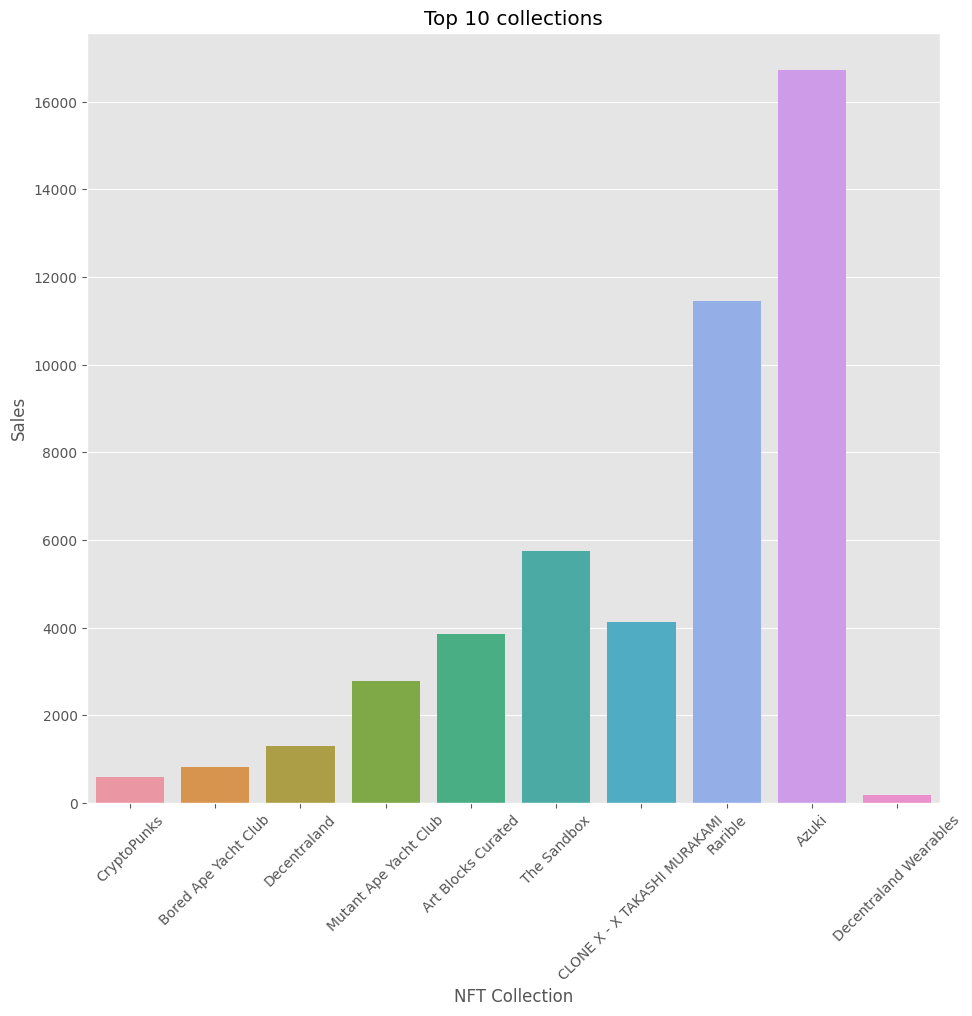

In [190]:
# visualise top 10

plt.figure(figsize=(11,10))
sns.barplot(x="name",y="thirty_day_sales",data= nft_10)
plt.title("Top 10 collections")
plt.xlabel('NFT Collection')
plt.ylabel('Sales')
plt.xticks(rotation=45)

The only collection that comes up more than once in the top 10 collection is 'Bored Ape' which again shows it is one of the best collections to invest in order to make a good return on investment.